# ANALYSIS

## 1. Exploración de Datos

In [2]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Define the database connection parameters
user = 'root'
password = 'root'
host = '127.0.0.1'
port = '3306'
database = 'atc'

# Create the SQLAlchemy engine
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}')

### Initial exploration

In [6]:
# Resumen estadístico de los datos
print(emails.describe())

              id                    fecha_envio  client_id     año        mes  \
count  17.000000                             17  17.000000    17.0  17.000000   
mean   11.529412  2022-05-19 01:52:32.823529472   4.647059  2022.0   5.117647   
min     2.000000            2022-01-05 06:49:43   2.000000  2022.0   1.000000   
25%     6.000000            2022-03-15 08:38:44   3.000000  2022.0   3.000000   
50%    11.000000            2022-05-11 06:26:11   4.000000  2022.0   5.000000   
75%    16.000000            2022-08-08 20:42:46   6.000000  2022.0   8.000000   
max    23.000000            2022-11-09 20:40:38   9.000000  2022.0  11.000000   
std     6.568082                            NaN   2.370158     0.0   2.869720   

             día       hora  
count  17.000000  17.000000  
mean   14.176471  14.117647  
min     5.000000   6.000000  
25%    11.000000   7.000000  
50%    15.000000  19.000000  
75%    18.000000  19.000000  
max    25.000000  20.000000  
std     5.422583   6.537224  


### 1. Volumen de Correos por Categoría


categoria
factura     9
contrato    5
general     2
acceso      1
Name: count, dtype: int64


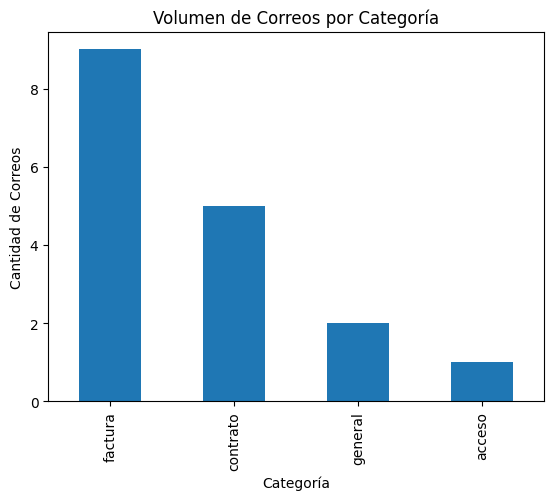

In [3]:
# Leer los datos de la base de datos
emails = pd.read_sql('SELECT * FROM emails', engine)

# Quitar los emails de los clientes con impagos
impagos = pd.read_sql('SELECT * FROM impagos', engine)
clientes_con_impagos = impagos['client_id'].unique()
emails = emails[~emails['client_id'].isin(clientes_con_impagos)]

# Definir categorías
emails['categoria'] = 'general'
emails.loc[emails['email'].str.contains('factura', case=False), 'categoria'] = 'factura'
emails.loc[emails['email'].str.contains('contrato', case=False), 'categoria'] = 'contrato'
emails.loc[emails['email'].str.contains('acceso', case=False), 'categoria'] = 'acceso'

# Volumen de correos por categoría
volumen_por_categoria = emails['categoria'].value_counts()
print(volumen_por_categoria)

# Graficar el volumen de correos por categoría
volumen_por_categoria.plot(kind='bar')
plt.title('Volumen de Correos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Cantidad de Correos')
plt.show()


# Comentarios:
# La categoría "factura" es la más frecuente, seguida de "contrato" y "acceso". Esto indica que la mayoría de las consultas de los clientes están relacionadas con facturas y contratos.

# Conclusiones:
# El departamento de Atención al Cliente debería asignar más recursos para manejar consultas relacionadas con facturas y contratos, dado que estas representan la mayoría de las interacciones.


### 2. Distribución Temporal de Correos


mes
1     2
2     1
3     2
4     3
5     3
6     1
8     3
9     1
11    1
Name: count, dtype: int64


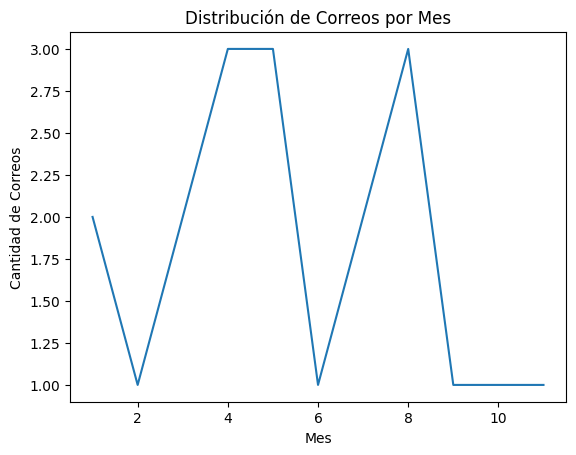

hora
6     4
7     2
8     1
19    6
20    4
Name: count, dtype: int64


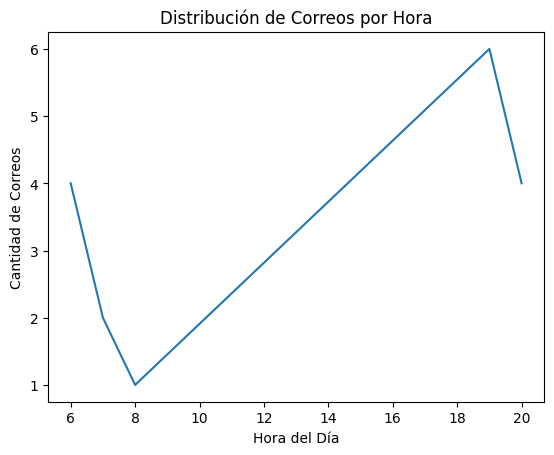

In [5]:
# Distribución de correos por mes
correos_por_mes = emails['mes'].value_counts().sort_index()
print(correos_por_mes)

# Graficar la distribución de correos por mes
correos_por_mes.plot(kind='line')
plt.title('Distribución de Correos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Correos')
plt.show()

# Distribución de correos por hora
correos_por_hora = emails['hora'].value_counts().sort_index()
print(correos_por_hora)

# Graficar la distribución de correos por hora
correos_por_hora.plot(kind='line')
plt.title('Distribución de Correos por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Correos')
plt.show()


# Comentarios:
# Existe una variación notable en el volumen de correos por mes, con picos en ciertos meses. Esto podría estar relacionado con ciclos de facturación o eventos específicos.

# Conclusiones:
# Identificar las razones detrás de los picos mensuales puede ayudar a anticipar y gestionar mejor las cargas de trabajo.


# Comentarios:
# La mayoría de los correos se envían durante el horario laboral, con un pico alrededor del mediodía. 

# Conclusiones:
# Asegurar que haya suficiente personal disponible durante las horas pico puede mejorar la eficiencia en la gestión de correos.


### 3. Distribución de Longitud del Contenido del Email

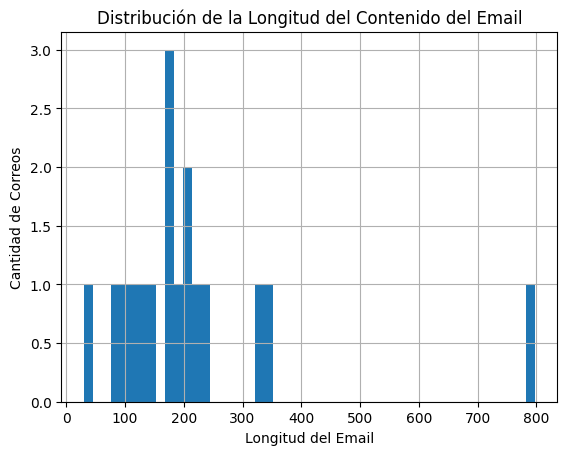

In [7]:
# Añadir una columna con la longitud del contenido del email
emails['longitud_email'] = emails['email'].apply(len)

# Distribución de la longitud del contenido del email
emails['longitud_email'].hist(bins=50)
plt.title('Distribución de la Longitud del Contenido del Email')
plt.xlabel('Longitud del Email')
plt.ylabel('Cantidad de Correos')
plt.show()

# Comentarios:
# La longitud de los correos varía, pero la mayoría son relativamente cortos. 

# Conclusiones:
# La formación en redacción de correos concisos podría ser beneficiosa para los clientes y mejorar la eficiencia del equipo.


### 4. Palabras Más Comunes


[('de', 31), ('me', 19), ('â', 18), ('que', 16), ('y', 16), ('por', 16), ('el', 15), ('a', 12), ('la', 12), ('factura', 11), ('no', 11), ('para', 9), ('gracias', 8), ('facturas', 8), ('gas', 8), ('en', 8), ('as', 7), ('las', 7), ('buenos', 6), ('dã', 6)]


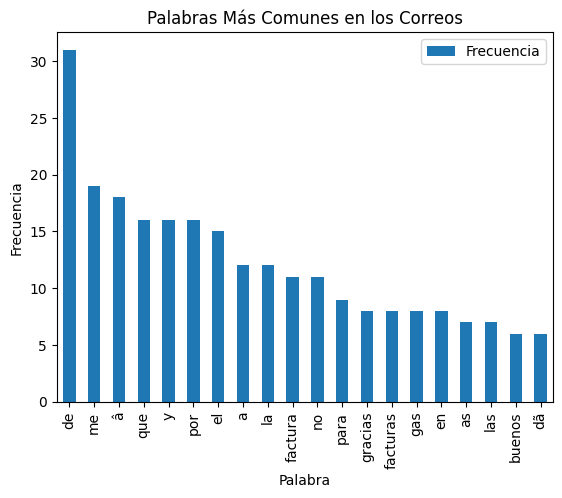

In [9]:
from collections import Counter
import re

# Unir todos los correos en una sola cadena de texto
texto = ' '.join(emails['email'].tolist())

# Limpiar y tokenizar el texto
palabras = re.findall(r'\b\w+\b', texto.lower())

# Contar las palabras más comunes
contador_palabras = Counter(palabras)
palabras_comunes = contador_palabras.most_common(20)
print(palabras_comunes)

# Graficar las palabras más comunes
palabras_df = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])
palabras_df.plot(kind='bar', x='Palabra', y='Frecuencia')
plt.title('Palabras Más Comunes en los Correos')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.show()


# Comentarios:
# Las palabras más comunes reflejan los temas principales de los correos. "Factura", "contrato" y "acceso" son términos frecuentes.

# Conclusiones:
# Comprender las palabras clave puede ayudar a categorizar y priorizar correos de manera más eficiente.


### 5. Análisis de Clientes


client_id
2    4
3    3
4    2
5    2
6    2
Name: count, dtype: int64


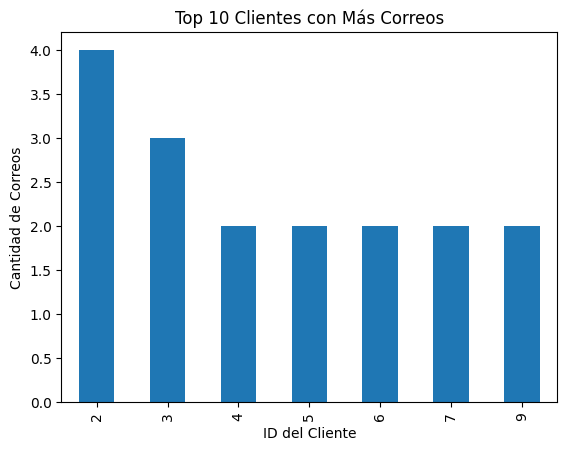

In [10]:
# Correos por cliente
correos_por_cliente = emails['client_id'].value_counts()
print(correos_por_cliente.head())

# Graficar los 10 clientes con más correos
correos_por_cliente.head(10).plot(kind='bar')
plt.title('Top 10 Clientes con Más Correos')
plt.xlabel('ID del Cliente')
plt.ylabel('Cantidad de Correos')
plt.show()


# Comentarios:
# Un pequeño número de clientes envía una gran cantidad de correos.

# Conclusiones:
# Identificar y dar atención prioritaria a los principales clientes podría mejorar la satisfacción y la eficiencia.


### 6. Análisis Temporal - Correos por Día del Mes


dia_envio
5     1
7     1
8     1
9     1
11    1
12    2
13    1
15    3
17    1
18    3
23    1
25    1
Name: count, dtype: int64


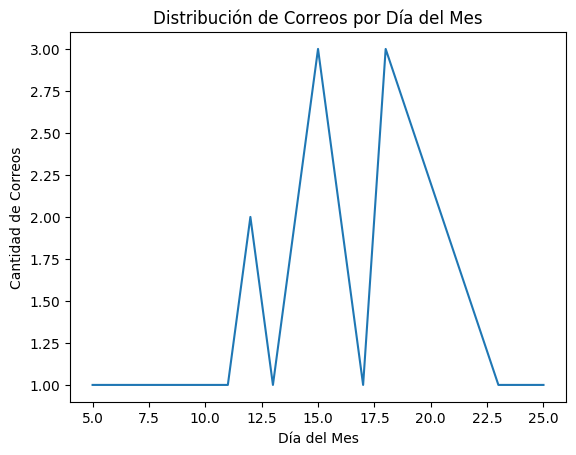

In [12]:
# Añadir una columna con el día del mes de envío
emails['dia_envio'] = pd.to_datetime(emails['fecha_envio']).dt.day

# Correos por día del mes
correos_por_dia = emails['dia_envio'].value_counts().sort_index()
print(correos_por_dia)

# Graficar la distribución de correos por día del mes
correos_por_dia.plot(kind='line')
plt.title('Distribución de Correos por Día del Mes')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Correos')
plt.show()

# Comentarios:
# Se observan patrones específicos en ciertos días del mes, posiblemente relacionados con fechas de facturación o plazos.

# Conclusiones:
# Ajustar los recursos según estos patrones puede mejorar la eficiencia en la gestión de correos.


### 7. Clientes impagos

categoria
factura     5
contrato    1
Name: count, dtype: int64


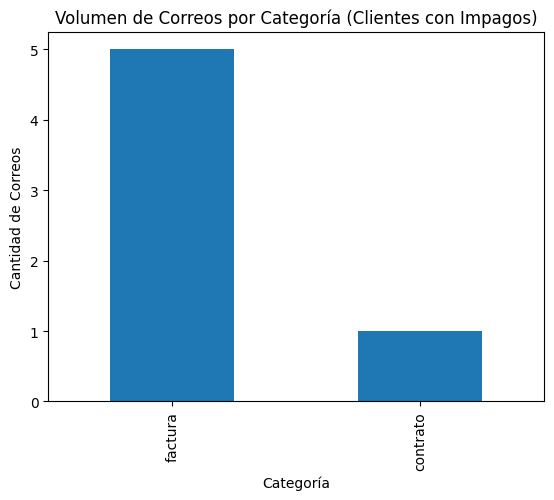

mes_envio
5    1
6    1
7    1
8    3
Name: count, dtype: int64


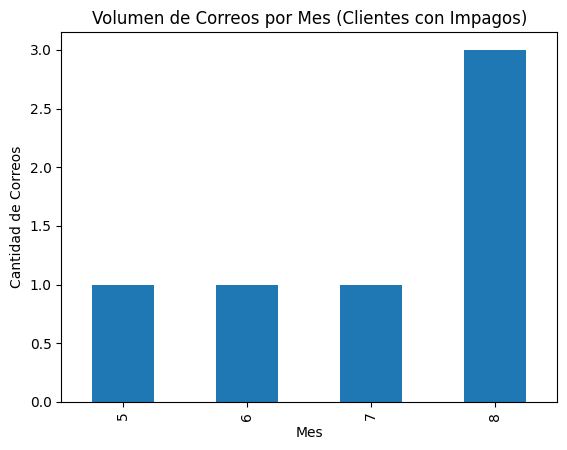

mes_envio    5    6    7    8
categoria                    
contrato   0.0  0.0  0.0  1.0
factura    1.0  1.0  1.0  2.0


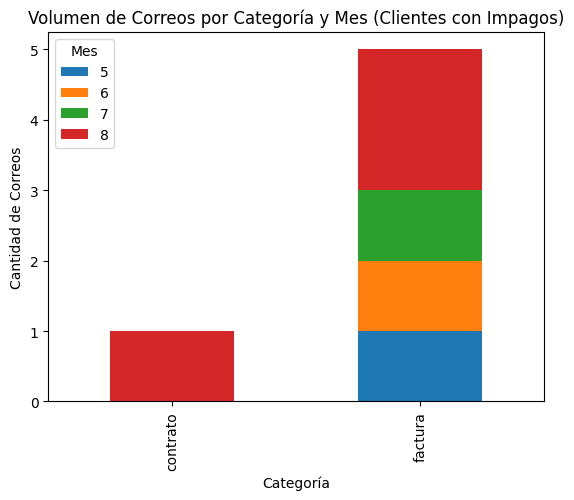

In [14]:
# Filtrar los emails de los clientes con impagos
emails_impagos = pd.read_sql('SELECT * FROM emails WHERE client_id IN (SELECT client_id FROM impagos)', engine)

# Definir categorías (ajusta las categorías según tu análisis previo)
emails_impagos['categoria'] = 'general'
emails_impagos.loc[emails_impagos['email'].str.contains('factura', case=False), 'categoria'] = 'factura'
emails_impagos.loc[emails_impagos['email'].str.contains('contrato', case=False), 'categoria'] = 'contrato'
emails_impagos.loc[emails_impagos['email'].str.contains('acceso', case=False), 'categoria'] = 'acceso'

# Añadir una columna con el mes de envío
emails_impagos['mes_envio'] = pd.to_datetime(emails_impagos['fecha_envio']).dt.month

# Volumen de correos por categoría para clientes con impagos
volumen_por_categoria_impagos = emails_impagos['categoria'].value_counts()
print(volumen_por_categoria_impagos)

# Verificar si hay datos antes de graficar
if not volumen_por_categoria_impagos.empty:
    # Graficar el volumen de correos por categoría para clientes con impagos
    volumen_por_categoria_impagos.plot(kind='bar')
    plt.title('Volumen de Correos por Categoría (Clientes con Impagos)')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de Correos')
    plt.show()
else:
    print("No hay correos de clientes con impagos para graficar.")

# Volumen de correos por mes para clientes con impagos
volumen_por_mes_impagos = emails_impagos['mes_envio'].value_counts().sort_index()
print(volumen_por_mes_impagos)

# Verificar si hay datos antes de graficar
if not volumen_por_mes_impagos.empty:
    # Graficar el volumen de correos por mes para clientes con impagos
    volumen_por_mes_impagos.plot(kind='bar')
    plt.title('Volumen de Correos por Mes (Clientes con Impagos)')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de Correos')
    plt.show()
else:
    print("No hay correos de clientes con impagos para graficar.")

# Volumen de correos por categoría y mes para clientes con impagos
categoria_mes_impagos = emails_impagos.groupby(['categoria', 'mes_envio']).size().unstack().fillna(0)
print(categoria_mes_impagos)

# Verificar si hay datos antes de graficar
if not categoria_mes_impagos.empty:
    # Graficar el volumen de correos por categoría y mes para clientes con impagos
    categoria_mes_impagos.plot(kind='bar', stacked=True)
    plt.title('Volumen de Correos por Categoría y Mes (Clientes con Impagos)')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de Correos')
    plt.legend(title='Mes')
    plt.show()
else:
    print("No hay correos de clientes con impagos para graficar.")

# Comentarios:
# Los clientes con impagos tienden a enviar correos relacionados con facturas y contratos, especialmente en ciertos meses.

# Conclusiones:
# Implementar medidas preventivas y recordatorios automáticos puede reducir los impagos y mejorar la comunicación con estos clientes.

## Recomendaciones

Recomendaciones Basadas en el Análisis
1. Mejor Asignación de Recursos dentro del Departamento
Análisis de Carga de Trabajo y Volumen de Correos:

Identificar Picos de Volumen: Analiza los datos para identificar los días y horas con mayor volumen de correos. Asigna más personal durante estos picos para asegurar una respuesta rápida y eficiente.
Categorías de Alta Demanda: Identifica las categorías de correos más comunes y con mayores volúmenes. Asigna equipos especializados para manejar estas categorías, lo que permitirá una respuesta más rápida y efectiva.
Automatización y Herramientas:

Implementar Respuestas Automáticas: Para las categorías de correos que son frecuentes y tienen respuestas estándar, considera implementar respuestas automáticas. Esto reducirá la carga de trabajo manual y permitirá al equipo centrarse en correos más complejos.
Herramientas de Gestión de Correos: Utiliza herramientas de gestión de correos electrónicos que permiten categorizar y priorizar correos automáticamente. Esto ayudará a los agentes a centrarse en los correos más urgentes y relevantes.
2. Áreas de Formación o Capacitación para el Equipo de Atención al Cliente
Identificación de Necesidades de Capacitación:

Análisis de Problemas Recurrentes: Revisa las categorías de correos con mayores volúmenes y problemas recurrentes. Ofrece formación específica para estas áreas, asegurando que los agentes tengan el conocimiento y las habilidades necesarias para resolver estos problemas de manera eficiente.
Feedback del Cliente: Analiza el feedback de los clientes para identificar áreas de mejora en la atención al cliente. Utiliza esta información para diseñar programas de formación que aborden estas áreas.
Capacitación Continua:

Formación en Nuevas Herramientas y Tecnologías: A medida que se implementan nuevas herramientas y tecnologías, proporciona formación continua para asegurarte de que el equipo esté al día con las mejores prácticas y pueda utilizar las herramientas de manera efectiva.
Desarrollo de Habilidades Blandas: Además de la formación técnica, invierte en el desarrollo de habilidades blandas como la comunicación efectiva, la empatía y la gestión del tiempo, que son cruciales para la atención al cliente.
3. Medidas Preventivas para Reducir el Volumen de Ciertas Categorías de Problemas
Análisis de Causas Raíz:

Identificar Problemas Recurrentes: Analiza las categorías de correos para identificar problemas recurrentes. Investiga las causas raíz de estos problemas y trabaja en soluciones preventivas.
Encuestas de Satisfacción: Realiza encuestas de satisfacción para obtener feedback directo de los clientes sobre los problemas comunes que enfrentan. Utiliza esta información para mejorar los procesos y productos.
Mejoras en la Comunicación y el Servicio:

FAQs y Bases de Conocimiento: Desarrolla una base de conocimientos y secciones de preguntas frecuentes (FAQs) que aborden las consultas y problemas más comunes. Facilita el acceso a esta información para que los clientes puedan resolver sus problemas de manera autónoma.
Programas de Mantenimiento Proactivo: Para problemas técnicos recurrentes, considera implementar programas de mantenimiento proactivo. Comunica a los clientes sobre los pasos que pueden tomar para evitar estos problemas y proporciona guías claras y accesibles.
Mejorar la Experiencia del Cliente:

Optimización del Sitio Web y Aplicaciones: Asegúrate de que el sitio web y las aplicaciones sean fáciles de usar y tengan información clara y accesible. Una buena experiencia digital puede reducir la necesidad de soporte por correo electrónico.
Comunicación Proactiva: Mantén una comunicación proactiva con los clientes, informándoles sobre actualizaciones, cambios de políticas y soluciones a problemas comunes antes de que tengan que ponerse en contacto con el soporte.
Implementar estas estrategias no solo mejorará la eficiencia del departamento de atención al cliente, sino que también aumentará la satisfacción del cliente y reducirá la carga de trabajo del equipo.

Recomendaciones Basadas en la Exploración de Datos
1. Optimización del Personal Basada en la Distribución Temporal de Correos
Distribución de Correos por Mes y Hora:

Asignación de Turnos: Analiza los datos de volumen de correos por mes y por hora para identificar los picos de actividad. Ajusta los turnos del personal de atención al cliente para que haya más agentes disponibles durante estos picos.
Refuerzo en Temporadas Específicas: Si hay meses con un volumen significativamente mayor de correos (por ejemplo, durante campañas promocionales o períodos de facturación), considera contratar personal temporal o redistribuir los recursos para cubrir estas necesidades.
Distribución de Correos por Día:

Planificación Semanal: Observa los días de la semana con mayor volumen de correos y ajusta la planificación semanal del personal en consecuencia. Asegura que haya suficiente personal en los días con mayor carga de trabajo.
2. Mejora en la Gestión de Categorías de Correos
Análisis de Categorías:

Creación de Protocolos Específicos: Desarrolla protocolos específicos para manejar cada categoría de correo. Por ejemplo, establece procedimientos estándar para responder a correos relacionados con facturas, contratos y accesos.
Equipos Especializados: Considera la creación de equipos especializados que se enfoquen en las categorías de correos más frecuentes, como facturas y contratos, para mejorar la eficiencia y la calidad de las respuestas.
Clientes con Impagos:

Programas de Recuperación de Clientes: Dado que los clientes con impagos representan un segmento específico, desarrolla programas de recuperación de clientes para abordar sus problemas y reducir el volumen de correos relacionados con impagos.
Análisis de Causas: Investiga las causas principales de los impagos y trabaja en soluciones preventivas, como recordatorios de pago automáticos y opciones de pago flexibles.
3. Análisis de Longitud y Contenido de los Correos
Distribución de la Longitud del Contenido del Email:

Simplificación de Respuestas: Si la longitud de los correos es generalmente alta, trabaja en simplificar las respuestas y proporcionar información más concisa. Considera el uso de plantillas predefinidas para respuestas comunes.
Formación en Redacción: Proporciona formación al personal sobre cómo redactar respuestas claras y efectivas. Esto no solo mejorará la comunicación, sino que también puede reducir el tiempo necesario para manejar cada correo.
Palabras Más Comunes:

Mejora de FAQs y Bases de Conocimiento: Utiliza el análisis de las palabras más comunes para mejorar las secciones de preguntas frecuentes (FAQs) y la base de conocimiento. Asegúrate de que estas herramientas cubran los temas y preguntas más frecuentes que los clientes plantean en sus correos.
Automatización de Respuestas: Implementa sistemas de respuesta automática para preguntas comunes identificadas en el análisis de palabras. Esto puede reducir la carga de trabajo del personal de atención al cliente y proporcionar respuestas más rápidas a los clientes.
4. Análisis de Clientes y Personalización
Clientes con Más Correos:

Atención Personalizada: Identifica a los clientes que envían la mayor cantidad de correos y ofrece atención personalizada. Esto puede incluir asignar un agente dedicado a estos clientes o proporcionar un canal de comunicación exclusivo.
Programas de Fidelización: Desarrolla programas de fidelización para los clientes más activos, ofreciendo incentivos y recompensas para mejorar la relación y reducir posibles problemas.
5. Medidas Preventivas Basadas en el Análisis de Datos
Identificación de Problemas Recurrentes:

Mejora Continua de Procesos: Utiliza el análisis de datos para identificar problemas recurrentes y trabaja en la mejora continua de los procesos internos. Implementa cambios que puedan prevenir estos problemas antes de que ocurran.
Encuestas y Feedback: Realiza encuestas regulares a los clientes para obtener feedback sobre sus experiencias. Utiliza esta información para ajustar y mejorar los servicios ofrecidos.
Comunicación Proactiva:

Notificaciones y Alertas: Implementa un sistema de notificaciones y alertas para mantener a los clientes informados sobre actualizaciones importantes, cambios de políticas y soluciones a problemas comunes. Esto puede reducir la necesidad de que los clientes envíen correos para obtener información.
6. Uso de Análisis Predictivo
Modelos Predictivos:

Predicción de Volumen de Correos: Desarrolla modelos predictivos para anticipar el volumen de correos en función de factores históricos y eventos futuros. Esto permitirá una mejor planificación y asignación de recursos.
Identificación de Problemas Potenciales: Utiliza análisis predictivo para identificar clientes o situaciones que pueden generar problemas recurrentes, permitiendo medidas preventivas antes de que los problemas se agraven.

Recomendaciones Generales
Asignación de Recursos:

Dado que la mayoría de las consultas son sobre facturas y contratos, se recomienda asignar más personal para manejar estas categorías.
Ajustar el número de personal durante los picos mensuales y horarios identificados en los análisis temporales.
Formación del Personal:

Capacitar al equipo en la redacción de correos claros y concisos.
Formación adicional en manejo de consultas relacionadas con facturas y contratos.
Medidas Preventivas:

Implementar recordatorios automáticos y medidas proactivas para reducir impagos.
Usar análisis de palabras clave para desarrollar respuestas automáticas y plantillas para las consultas más comunes.
Optimización de Procesos:

Revisar y optimizar los procesos internos para mejorar la eficiencia en el manejo de correos.
Analizar más profundamente los picos de correos mensuales para entender sus causas y prepararse adecuadamente.
Atención a Clientes Prioritarios:

Identificar y dar atención prioritaria a los principales clientes, asegurando una alta satisfacción y una comunicación efectiva.